## Introduction to Machine Learning with Python - part3
#### Scikit-learn을 중심으로 ML 관련 내용을 정리하였습니다. 파이썬 라이브러리를 활용한 머신러닝(번역개정2판, 안드레아스 뮐러, 세라 가이도 지음)을 참고하였습니다.

## 4. 데이터 표현과 특성 공학
#### 데이터가 어떤 형태의 특성으로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 더큼 / 올바른 데이터 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 큰 영향
#### 특성 공학(feature engineering) : 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것

### 4.1 범주형 변수 
#### 4.1.1 원-핫-인코딩(가변수)
#### 원-핫-인코딩(one-hot-encoding) : 원-아웃-오브-엔 인코딩(one-out-of N encoding), 가변수(dummy variable) / 0 또는 1값을 가진 하나 이상의 새로운 특성

In [1]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
#### matplotlib 한글 세팅
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import sklearn

In [3]:
import os
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False, 
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                          'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print('원본 특성 : \n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('get_dummies 후의 특성 : \n', list(data_dummies.columns))

원본 특성 : 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성 : 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupati

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape : {} y.shape : {}".format(X.shape, y.shape))

X.shape : (32561, 44) y.shape : (32561,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print('테스트 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 점수 : 0.81


#### 4.1.2 숫자로 표현된 범주형 특성

In [15]:
demo_df = pd.DataFrame({'숫자 특성' : [0,1,2,1],
                       '범주형 특성' : ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [13]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [18]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


### 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))
print(ohe.get_feature_names())

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]
['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('scaling', StandardScaler(), ['age', 'hours-per-week']),
                       ('onehot', OneHotEncoder(sparse=False),
                       ['workclass', 'education', 'gender', 'occupation'])])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print('테스트 점수 : {:.2f}'.format(logreg.score(X_test_trans, y_test)))

테스트 점수 : 0.81


### 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

In [27]:
from sklearn.compose import make_column_transformer
ct =make_column_transformer((StandardScaler(), ['age', 'hours-per-week']),
                           (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

### 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

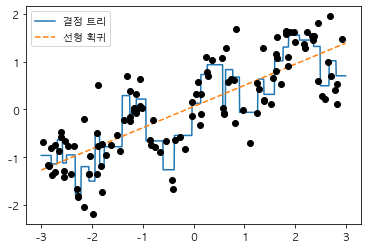

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label = '결정 트리')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label = '선형 획귀')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.legend(loc='best')

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges : \n', kb.bin_edges_)

X_binned = kb.transform(X)
X_binned

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [34]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

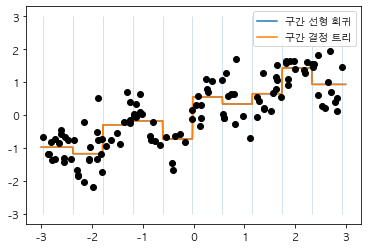

In [35]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

line_binned = kb.transform(line)
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 결정 트리')
plt.plot(X[:, 0], y , 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')

### 4.5 상호작용과 다항식

(120, 11)


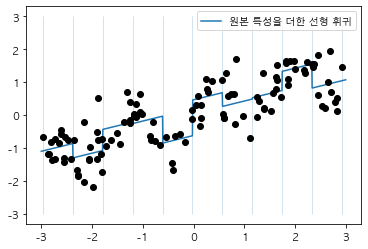

In [39]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 특성을 더한 선형 휘귀')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

(120, 20)


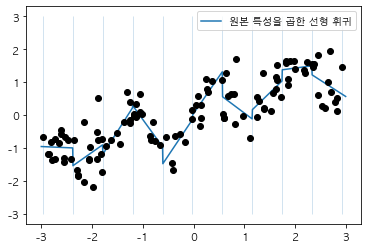

In [47]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line_binned*line])
plt.plot(line, reg.predict(line_product), label = '원본 특성을 곱한 선형 휘귀')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print('X_poly.shape : ', X_poly.shape)
print('X 원소 : \n', X[:5])
print('X_poly 원소 : \n', X_poly[:5])
print("항 이름 : \n", poly.get_feature_names())

X_poly.shape :  (120, 10)
X 원소 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소 : 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
항 이름 : 
 ['x0', 'x0^2', 'x0^3', 'x0^4',

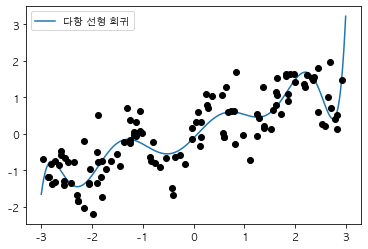

In [51]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = '다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')

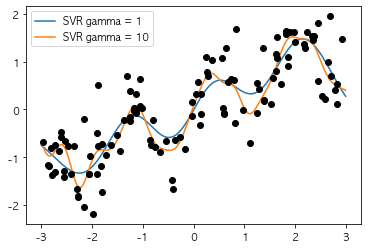

In [53]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')

In [55]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_train_poly.shape)
print('다항 특성 이름 : \n', poly.get_feature_names())

X_train.shape :  (379, 13)
X_test.shape :  (379, 105)
다항 특성 이름 : 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상화작용 특성이 없을 때 점수 : {:.2f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상화작용 특성이 있을 때 점수 : {:.2f}".format(ridge.score(X_test_poly, y_test)))

상화작용 특성이 없을 때 점수 : 0.62
상화작용 특성이 있을 때 점수 : 0.75


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상화작용 특성이 없을 때 점수 : {:.2f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상화작용 특성이 있을 때 점수 : {:.2f}".format(rf.score(X_test_poly, y_test)))

상화작용 특성이 없을 때 점수 : 0.80
상화작용 특성이 있을 때 점수 : 0.78


### 4.6 일변량 비선형 변환

[ 56  81  25  20  27  18  12  21 109   7]
특성 출현 횟수 : 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


<BarContainer object of 141 artists>

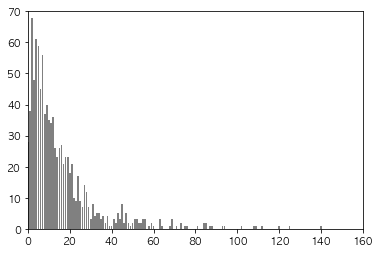

In [65]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10,0])
print('특성 출현 횟수 : \n', np.bincount(X[:, 0]))

plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color = 'grey')

In [66]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수 : {:.2f}'.format(score))

테스트 점수 : 0.62


(array([19.,  0.,  0., 31.,  0., 56.,  0., 37., 41., 44., 67., 29., 82.,
        50., 60., 65., 48., 32., 23., 21., 19.,  7.,  7.,  8.,  4.]),
 array([0.        , 0.19183162, 0.38366324, 0.57549487, 0.76732649,
        0.95915811, 1.15098973, 1.34282135, 1.53465297, 1.7264846 ,
        1.91831622, 2.11014784, 2.30197946, 2.49381108, 2.68564271,
        2.87747433, 3.06930595, 3.26113757, 3.45296919, 3.64480081,
        3.83663244, 4.02846406, 4.22029568, 4.4121273 , 4.60395892,
        4.79579055]),
 <BarContainer object of 25 artists>)

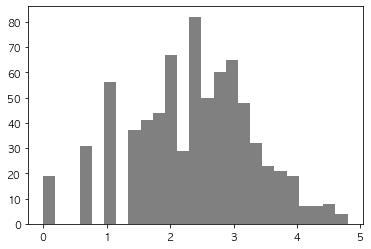

In [67]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins = 25, color = 'grey')

In [68]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수 : {:2f}'.format(score))

테스트 점수 : 0.874934


### 4.7 특성 자동 선택
#### 4.7.1 일변량 통계
#### 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산 -> 깊게 관련되어 있다고 판단되는 특성을 선택
#### 분류에서는 분산분석이라고도 함
#### 핵심 요소는 일변량, 즉 각 특성이 독립적으로 평가된다는 점 -> 다른 특성과 깊계 연관된 특성은 선택되지 않음

X_train.shape :  (284, 80)
X_train_selected.shape :  (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7fd7c497bc50>], [Text(0, 0, '')])

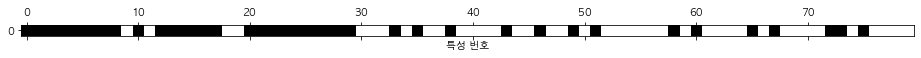

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print('X_train.shape : ', X_train.shape)
print('X_train_selected.shape : ', X_train_selected.shape)

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [75]:
from sklearn.linear_model import LogisticRegression

X_test_selceted = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수 : {:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수 : {:.3f}'.format(lr.score(X_test_selceted, y_test)))

전체 특성을 사용한 점수 : 0.947
선택된 일부 특성을 사용한 점수 : 0.933


#### 4.7.2 모델 기반 특성 선택
#### 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택
#### 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도 학습 모델과 같을 필요는 없음 

X_train.shape : (284, 80)
X_train_l1.shape :  (284, 40)
[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


Text(0.5, 0, '특성 번호')

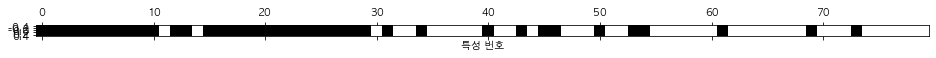

In [77]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape :', X_train.shape)
print("X_train_l1.shape : ", X_train_l1.shape)

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')

In [78]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.947


#### 4.7.3 반복적 특성 선택 
#### 특성의 수가 각기 다른 일련의 모델이 만들어짐

Text(0.5, 0, '특성 번호')

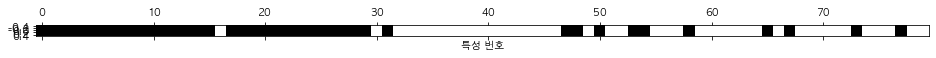

In [79]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')

In [80]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.940


### 4.8 전문가 지식 활용

시티 데이터 바이크 : 
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


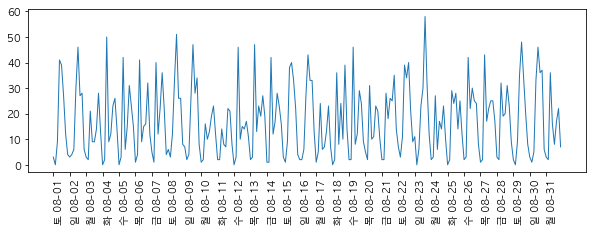

In [83]:
citibike = mglearn.datasets.load_citibike()
print('시티 데이터 바이크 : \n', citibike.head())

plt.figure(figsize =(10,3))
xticks = pd.date_range(start=citibike.index.min(), end = citibike.index.max(), freq='D')
week = ['일', '월', '화', '수', '목', '금', '토']
xticks_name = [week[int(w)] + d for w, d in zip(xtics.strftime('%w'), xtics.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha = 'left')
plt.plot(citibike, linewidth=1)

테스트 세트 R^2 : -0.04


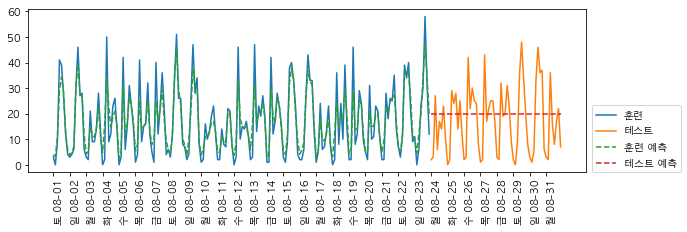

In [86]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1, 1)

n_train = 184
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('테스트 세트 R^2 : {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10, 3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha = 'left')
    plt.plot(range(n_train), y_train, label = '훈련')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = '테스트')
    plt.plot(range(n_train), y_pred_train, '--', label = '훈련 예측')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = '테스트 예측')
    plt.legend(loc=(1.01, 0))
    

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2 : 0.60


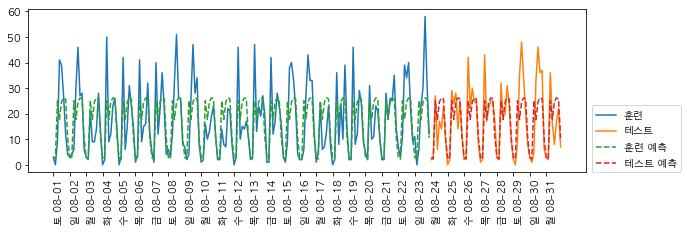

In [89]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2 : 0.84


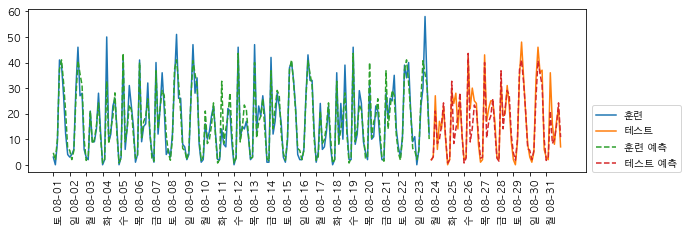

In [90]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2 : 0.13


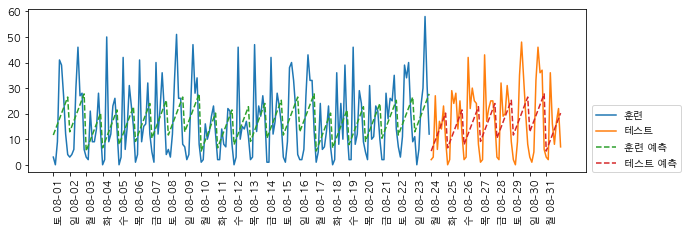

In [91]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

테스트 세트 R^2 : 0.62


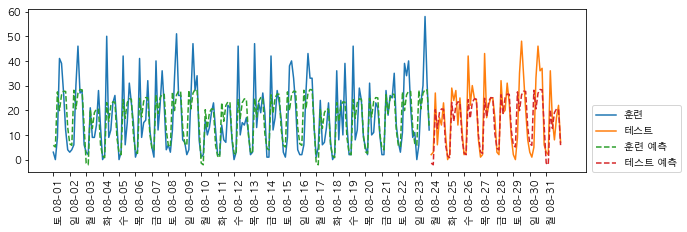

In [93]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2 : 0.85


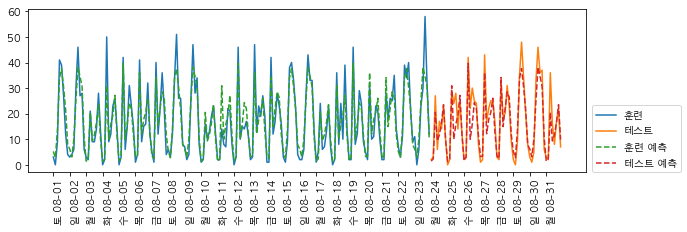

In [94]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

([<matplotlib.axis.XTick at 0x7fd7c52364e0>,
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일'),
  Text(7, 0, '00:00'),
  Text(8, 0, '03:00'),
  Text(9, 0, '06:00'),
  Text(10, 0, '09:00'),
  Text(11, 0, '12:00'),
  Text(12, 0, '15:00'),
  Text(13, 0, '18:00'),
  Text(14, 0, '21:00'),
  Text(15, 0, '월 00:00'),
  Text(16, 0, '월 03:00'),
  Text(17, 0, '월 06:00'),
  Text(18, 0, '월 09:00'),
  Text(19, 0, '월 12:00'),
  Text(20, 0, '월 15:00'),
  Text(21, 0, '월 18:00'),
  Text(22, 0, '월 21:00'),
  Text(23, 0, '화 00:00'),
  Text(24, 0, '화 03:00'),
  Text(25, 0, '화 06:00'),
  Text(26, 0, '화 09:00'),
  Text(27, 0, '화 12:00'),
  Text(28, 0, '화 15:00'),
  Text(29, 0, '화 18:00'),
  Text(30, 0, '화 21:00'),
  Text(31, 0, '수 00:00'),
  Text(32, 0, '수 03:00'),
  Text(33, 0, '수 06:00'),
  Text(34, 0, '수 09:00'),
  Text(35, 0, '수 12:00'),
  Text(36, 0, '수 15:00'),
  Text(37, 0, '수 18:00'),
  Text(38, 0, '수 21:00'),
  Text(39

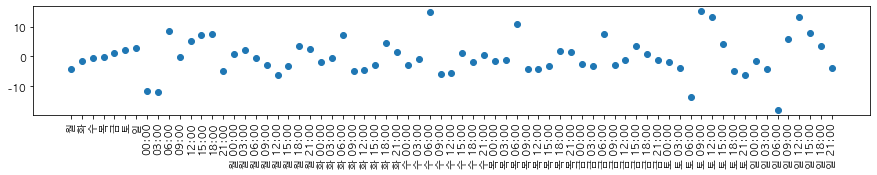

In [95]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['월', '화', '수', '목', '금', '토', '일']
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)